<a href="https://colab.research.google.com/github/SolFreire/SingleLayerPerceptronNetworkArtificialData/blob/main/SingleLayerPerceptronArtificialDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import seaborn as sns

In [2]:
class PerceptronMulticlass:
    def __init__(self, n_features, n_classes, lr=0.01, epochs=50):
        self.lr = lr
        self.epochs = epochs
        self.n_classes = n_classes
        self.weights = torch.randn(n_classes, n_features, dtype=torch.float32)
        self.bias = torch.full((n_classes,), -1.0)
        self.errors_per_epoch = []

    def activation(self, x):
        return torch.where(x >= 0, 1.0, 0.0)

    def fit(self, X, y_one_hot):
        X = torch.tensor(X, dtype=torch.float32)
        y_one_hot = torch.tensor(y_one_hot, dtype=torch.float32)

        for epoch in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y_one_hot):
                z = torch.matmul(self.weights, xi) + self.bias
                y_pred = self.activation(z)
                update = self.lr * (target - y_pred)
                if torch.any(update != 0):

                    for j in range(self.n_classes):
                        self.weights[j] += update[j] * xi
                        self.bias[j] += update[j]
                    errors += 1

            self.errors_per_epoch.append(errors)

    def predict(self, X):
        X = torch.tensor(X, dtype=torch.float32)
        z = torch.matmul(self.weights, X.T).T + self.bias
        return torch.argmax(z, dim=1).numpy()

In [3]:
n = 50
center_circle = (2, 10)
center_triangle = (12, 10)
center_star = (7, 5)
sigma = 0.8

circle = np.random.normal(loc=center_circle, scale=sigma, size=(n, 2))
triangle = np.random.normal(loc=center_triangle, scale=sigma, size=(n, 2))
star = np.random.normal(loc=center_star, scale=sigma, size=(n, 2))

In [4]:
d_circle = np.tile([1, 0, 0], (n, 1))
d_triangle = np.tile([0, 1, 0], (n, 1))
d_star = np.tile([0, 0, 1], (n, 1))

In [5]:
X = np.vstack([circle, triangle, star])
D = np.vstack([d_circle, d_triangle, d_star])


In [9]:
dataset = pd.DataFrame({
    "x1": X[:, 0],
    "x2": X[:, 1],
    "d1": D[:, 0],
    "d2": D[:, 1],
    "d3": D[:, 2],
})

print(dataset.head())
print(dataset.shape)


         x1         x2  d1  d2  d3
0  2.110145  11.074742   1   0   0
1  2.111230   9.347856   1   0   0
2  2.833041   9.554113   1   0   0
3  0.597980  11.313335   1   0   0
4  1.047659  10.938430   1   0   0
(150, 5)


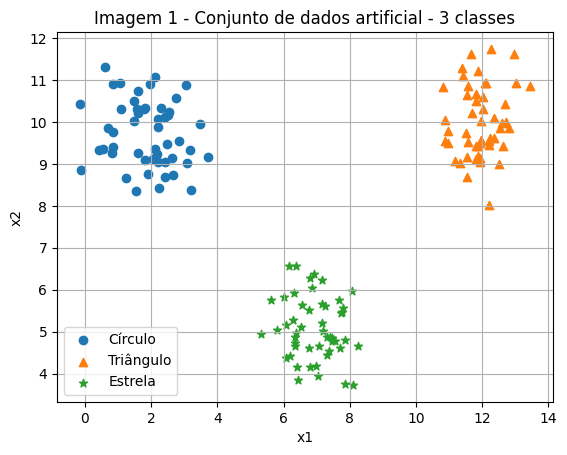

In [18]:
plt.scatter(circle[:, 0], circle[:, 1], label="Círculo", marker="o")
plt.scatter(triangle[:, 0], triangle[:, 1], label="Triângulo", marker="^")
plt.scatter(star[:, 0], star[:, 1], label="Estrela", marker="*")

plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Imagem 1 - Conjunto de dados artificial - 3 classes")
plt.grid(True)
plt.show()

In [11]:
y_labels = np.argmax(D, axis=1)

In [12]:
X_train, X_test, d_train, d_test, y_train, y_test = train_test_split(
    X, D, y_labels, test_size=0.2, random_state=42, stratify=y_labels
)

In [13]:
model = PerceptronMulticlass(
    n_features=2,
    n_classes=3,
    lr=0.01,
    epochs=50
)

model.fit(X_train, d_train)

Acurácia: 1.0


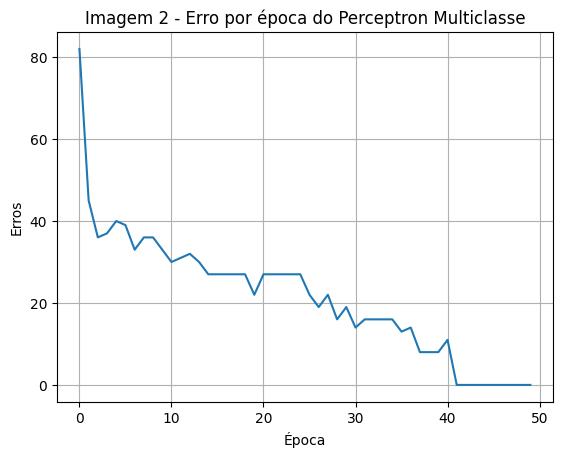

In [19]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("Acurácia:", acc)


plt.plot(model.errors_per_epoch)
plt.xlabel("Época")
plt.ylabel("Erros")
plt.title("Imagem 2 - Erro por época do Perceptron Multiclasse")
plt.grid(True)
plt.show()

In [31]:
accuracies = []
conf_matrices = []

for run in range(20):
    X_train, X_test, d_train, d_test, y_train, y_test = train_test_split(
    X, D, y_labels, test_size=0.2, random_state=42, stratify=y_labels
    )
    model = PerceptronMulticlass( 2, 3, lr=0.01, epochs=50)
    model.fit(X_train, d_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    conf_matrices.append(confusion_matrix(y_test, y_pred))

    print(f"Realização {run+1}: Acurácia = {acc:.4f}")

mean_acc = np.mean(accuracies)
std_acc = np.std(accuracies)
best_run = np.argmax(accuracies)

print("\n Resultados gerais:")
print(f"Acurácia média: {mean_acc:.4f}")
print(f"Desvio padrão:  {std_acc:.4f}")
print(f"Melhor realização: {best_run+1} (Acurácia = {accuracies[best_run]:.4f})")

best_conf = conf_matrices[best_run]

plt.figure(figsize=(6, 5))
sns.heatmap(best_conf, annot=True, fmt="d", cmap="Blues",
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.title(f"Matriz de Confusão - Melhor Realização ({best_run+1})")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.show()


plt.figure(figsize=(7, 4))
plt.plot(range(1, len(model.errors_per_epoch)+1), model.errors_per_epoch, marker='o')
plt.title("Soma dos erros por época - Perceptron")
plt.xlabel("Época")
plt.ylabel("Número de erros")
plt.grid(True)
plt.show()


Realização 1: Acurácia = 1.0000
Realização 2: Acurácia = 1.0000
Realização 3: Acurácia = 1.0000
Realização 4: Acurácia = 1.0000
Realização 5: Acurácia = 1.0000
Realização 6: Acurácia = 1.0000
Realização 7: Acurácia = 1.0000
Realização 8: Acurácia = 1.0000
Realização 9: Acurácia = 1.0000
Realização 10: Acurácia = 1.0000
Realização 11: Acurácia = 1.0000
Realização 12: Acurácia = 1.0000
Realização 13: Acurácia = 1.0000
Realização 14: Acurácia = 1.0000
Realização 15: Acurácia = 1.0000
Realização 16: Acurácia = 1.0000
Realização 17: Acurácia = 1.0000
Realização 18: Acurácia = 1.0000
Realização 19: Acurácia = 1.0000
Realização 20: Acurácia = 1.0000

 Resultados gerais:
Acurácia média: 1.0000
Desvio padrão:  0.0000
Melhor realização: 1 (Acurácia = 1.0000)


NameError: name 'data' is not defined

<Figure size 600x500 with 0 Axes>

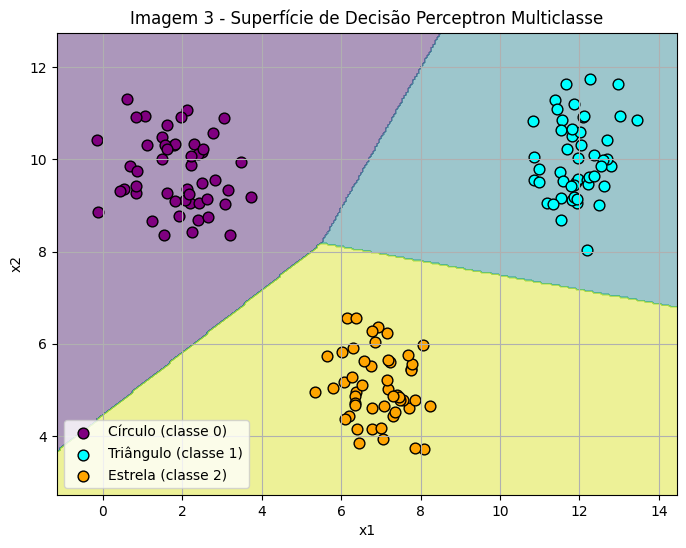

In [32]:
feat1 = 0
feat2 = 1

x_min, x_max = X[:, feat1].min() - 1, X[:, feat1].max() + 1
y_min, y_max = X[:, feat2].min() - 1, X[:, feat2].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)


X_grid = np.c_[xx.ravel(), yy.ravel()]


Z = model.predict(X_grid)
Z = Z.reshape(xx.shape)


plt.figure(figsize=(8,6))


plt.contourf(xx, yy, Z, alpha=0.45, cmap="viridis")


plt.scatter(circle[:, 0], circle[:, 1], c="purple", edgecolor="black", label="Círculo (classe 0)", s=60)
plt.scatter(triangle[:, 0], triangle[:, 1], c="cyan", edgecolor="black", label="Triângulo (classe 1)", s=60)
plt.scatter(star[:, 0], star[:, 1], c="orange", edgecolor="black", label="Estrela (classe 2)", s=60)

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Imagem 3 - Superfície de Decisão Perceptron Multiclasse")

plt.legend()
plt.grid(True)
plt.show()

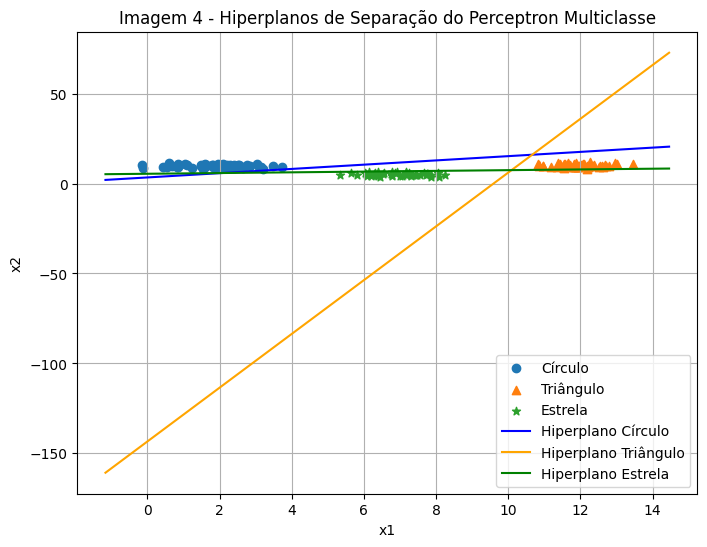

In [35]:
plt.figure(figsize=(8,6))


plt.scatter(circle[:, 0], circle[:, 1], label="Círculo", marker="o")
plt.scatter(triangle[:, 0], triangle[:, 1], label="Triângulo", marker="^")
plt.scatter(star[:, 0], star[:, 1], label="Estrela", marker="*")


x_vals = np.linspace(min(X[:,0])-1, max(X[:,0])+1, 200)


W = model.weights.detach().numpy()
b = model.bias.detach().numpy()

colors = ["blue", "orange", "green"]
labels = ["Hiperplano Círculo", "Hiperplano Triângulo", "Hiperplano Estrela"]

for j in range(3):
    w1, w2 = W[j]
    bj = b[j]


    if abs(w2) < 1e-6:
        continue


    y_vals = -(w1/w2) * x_vals - bj / w2
    plt.plot(x_vals, y_vals, color=colors[j], label=labels[j])

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Imagem 4 - Hiperplanos de Separação do Perceptron Multiclasse")
plt.legend()
plt.grid(True)
plt.show()